In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from PIL import Image
import math
import datetime
import pylab
from mpl_toolkits.mplot3d import Axes3D
import random
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [295]:
print __version__

2.0.7


<h3>Part 1: Loading Flight Logs</h3>

In [211]:
flight_data = pd.read_csv('../data/2017-04-17_16-49-41_Standard.csv')

In [212]:
flight_data = flight_data[flight_data['flycState'] == "Waypoint"]

In [213]:
flight_data = flight_data.rename(columns={'altitude(feet)': 'altitude', 
                            'ascent(feet)': 'ascent',
                            'time(millisecond)': 'flight_time',
                            'datetime(utc)': 'datetime'})


In [214]:
flight_data = flight_data[['latitude', 'longitude', 'ascent', 'flight_time', 'datetime']].copy()


In [215]:
flight_data.head(10)

,latitude,longitude,ascent,flight_time,datetime
11,40.282239,-74.58595,2.624672,1090,2017-04-17 17:49:42
12,40.282238,-74.58595,3.280840,1290,2017-04-17 17:49:42
13,40.282238,-74.58595,3.280840,1390,2017-04-17 17:49:43
14,40.282238,-74.58595,3.608924,1490,2017-04-17 17:49:43
15,40.282238,-74.58595,3.937008,1580,2017-04-17 17:49:43
16,40.282238,-74.58595,3.937008,1690,2017-04-17 17:49:43
17,40.282238,-74.58595,4.921260,1790,2017-04-17 17:49:43
18,40.282238,-74.58595,5.577428,1990,2017-04-17 17:49:43
19,40.282237,-74.58595,5.905512,2090,2017-04-17 17:49:43
20,40.282237,-74.58595,6.561680,2190,2017-04-17 17:49:43


In [216]:
def round_hundred(x):
    return int(round(x / 100.0)) * 100


In [217]:
flight_data['flight_time'] = data['flight_time'].apply(lambda row: round_hundred(row))

In [218]:
flight_data['dt_datetime'] = pd.to_datetime(flight_data['datetime'])

In [219]:
flight_data.head()

,latitude,longitude,ascent,flight_time,datetime,dt_datetime
11,40.282239,-74.58595,2.624672,1100,2017-04-17 17:49:42,2017-04-17 17:49:42
12,40.282238,-74.58595,3.280840,1300,2017-04-17 17:49:42,2017-04-17 17:49:42
13,40.282238,-74.58595,3.280840,1400,2017-04-17 17:49:43,2017-04-17 17:49:43
14,40.282238,-74.58595,3.608924,1500,2017-04-17 17:49:43,2017-04-17 17:49:43
15,40.282238,-74.58595,3.937008,1600,2017-04-17 17:49:43,2017-04-17 17:49:43


In [220]:
min_time = flight_data['dt_datetime'].min()
max_time = flight_data['dt_datetime'].max()

In [221]:
second = min_time + datetime.timedelta(seconds=1)
flight_data = flight_data[flight_data['dt_datetime'] >= second]

In [222]:
min_flight_time = flight_data['flight_time'].min()
flight_data['flight_time'] = flight_data['flight_time'].apply(lambda x: x - min_flight_time)

In [223]:
flight_data.head()

,latitude,longitude,ascent,flight_time,datetime,dt_datetime
13,40.282238,-74.58595,3.280840,0,2017-04-17 17:49:43,2017-04-17 17:49:43
14,40.282238,-74.58595,3.608924,100,2017-04-17 17:49:43,2017-04-17 17:49:43
15,40.282238,-74.58595,3.937008,200,2017-04-17 17:49:43,2017-04-17 17:49:43
16,40.282238,-74.58595,3.937008,300,2017-04-17 17:49:43,2017-04-17 17:49:43
17,40.282238,-74.58595,4.921260,400,2017-04-17 17:49:43,2017-04-17 17:49:43


In [224]:
min_time = flight_data['dt_datetime'].min()

In [225]:
flight_data['ms_time'] = flight_data.apply(lambda row: min_time + datetime.timedelta(milliseconds=row['flight_time']), axis=1)

(-74.585952000000006, -74.585758999999996)

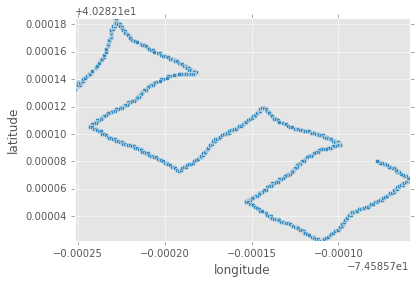

In [261]:
ax = flight_data.plot(kind="scatter", y="latitude", x="longitude")
ax.set_ylim(flight_data['latitude'].min(),flight_data['latitude'].max())
ax.set_xlim(flight_data['longitude'].min(),flight_data['longitude'].max())

<h3>Part 2: Loading RFE Data </h3>

In [247]:
rf_data = pd.read_csv('../data/test_04_17_at_19_52.csv')

In [248]:
rf_data['dt_time'] = pd.to_datetime(rf_data['time'])

In [249]:
rf_data = rf_data[rf_data['dt_time'] >= min_time]
rf_data = rf_data[rf_data['dt_time'] <= max_time]

In [250]:
rf_data.head()

,time,freq,dBm,dt_time
943730,2017-04-17 17:49:43.072729,2401,-79.0,2017-04-17 17:49:43.072729
943731,2017-04-17 17:49:43.072729,2403,-87.5,2017-04-17 17:49:43.072729
943732,2017-04-17 17:49:43.072729,2405,-87.0,2017-04-17 17:49:43.072729
943733,2017-04-17 17:49:43.072729,2408,-87.0,2017-04-17 17:49:43.072729
943734,2017-04-17 17:49:43.072729,2410,-90.0,2017-04-17 17:49:43.072729


In [251]:
def micro_to_milli(x):
    milli = round_hundred(round(x.microsecond/1000.0))
    ms = milli*1000
    diff = ms - x.microsecond
    diff = datetime.timedelta(microseconds = diff)
    return x + diff

In [252]:
rf_data['ms_time'] = rf_data['dt_time'].apply(lambda x: micro_to_milli(x))

In [253]:
rf_data.head()

,time,freq,dBm,dt_time,ms_time
943730,2017-04-17 17:49:43.072729,2401,-79.0,2017-04-17 17:49:43.072729,2017-04-17 17:49:43.100
943731,2017-04-17 17:49:43.072729,2403,-87.5,2017-04-17 17:49:43.072729,2017-04-17 17:49:43.100
943732,2017-04-17 17:49:43.072729,2405,-87.0,2017-04-17 17:49:43.072729,2017-04-17 17:49:43.100
943733,2017-04-17 17:49:43.072729,2408,-87.0,2017-04-17 17:49:43.072729,2017-04-17 17:49:43.100
943734,2017-04-17 17:49:43.072729,2410,-90.0,2017-04-17 17:49:43.072729,2017-04-17 17:49:43.100


<h3>Part 3: Joining Flight Logs and RFE Data</h3>

In [254]:
flight_data.set_index('ms_time', inplace=True, verify_integrity=False)

In [273]:
flight_data.head()

,latitude,longitude,ascent,flight_time,datetime,dt_datetime
ms_time,,,,,,
2017-04-17 17:49:43.000,40.282238,-74.58595,3.280840,0,2017-04-17 17:49:43,2017-04-17 17:49:43
2017-04-17 17:49:43.100,40.282238,-74.58595,3.608924,100,2017-04-17 17:49:43,2017-04-17 17:49:43
2017-04-17 17:49:43.200,40.282238,-74.58595,3.937008,200,2017-04-17 17:49:43,2017-04-17 17:49:43
2017-04-17 17:49:43.300,40.282238,-74.58595,3.937008,300,2017-04-17 17:49:43,2017-04-17 17:49:43
2017-04-17 17:49:43.400,40.282238,-74.58595,4.921260,400,2017-04-17 17:49:43,2017-04-17 17:49:43


In [274]:
joined = rf_data.join(flight_data, on='ms_time', how='inner', rsuffix='_flight')

In [287]:
joined.head()

,time,freq,dBm,dt_time,ms_time,latitude,longitude,ascent,flight_time,datetime,dt_datetime
943730,2017-04-17 17:49:43.072729,2401,-79.0,2017-04-17 17:49:43.072729,2017-04-17 17:49:43.100,40.282238,-74.58595,3.608924,100,2017-04-17 17:49:43,2017-04-17 17:49:43
943731,2017-04-17 17:49:43.072729,2403,-87.5,2017-04-17 17:49:43.072729,2017-04-17 17:49:43.100,40.282238,-74.58595,3.608924,100,2017-04-17 17:49:43,2017-04-17 17:49:43
943732,2017-04-17 17:49:43.072729,2405,-87.0,2017-04-17 17:49:43.072729,2017-04-17 17:49:43.100,40.282238,-74.58595,3.608924,100,2017-04-17 17:49:43,2017-04-17 17:49:43
943733,2017-04-17 17:49:43.072729,2408,-87.0,2017-04-17 17:49:43.072729,2017-04-17 17:49:43.100,40.282238,-74.58595,3.608924,100,2017-04-17 17:49:43,2017-04-17 17:49:43
943734,2017-04-17 17:49:43.072729,2410,-90.0,2017-04-17 17:49:43.072729,2017-04-17 17:49:43.100,40.282238,-74.58595,3.608924,100,2017-04-17 17:49:43,2017-04-17 17:49:43


In [275]:
def filter_freq(df, freq):
    return df[(df['freq'] >= (freq-2)) & (df['freq'] <= (freq+2))]

In [282]:
joined_freq = filter_freq(joined, 2442)

(-74.585952000000006, -74.585758999999996)

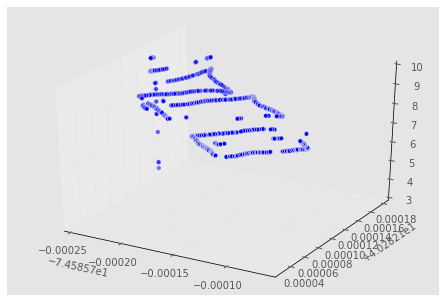

In [286]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(joined_freq['longitude'], joined_freq['latitude'], joined_freq['ascent'])
ax.set_ylim(joined_freq['latitude'].min(),joined_freq['latitude'].max())
ax.set_xlim(joined_freq['longitude'].min(),joined_freq['longitude'].max())

In [299]:
trace1 = go.Scatter3d(
    x=joined_freq['longitude'],
    y=joined_freq['latitude'],
    z=joined_freq['ascent'],
    mode='markers',
    marker=dict(
        size=6,
        color=joined_freq['dBm'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')